In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def lee_archivo(archivo):
	f = open(archivo, "r")
	contenido = f.read()
	f.close()

	lines = contenido.split("\n")
	n = int(lines[0])
	points = [ list(map(float, lines[i].split("\t")))  for i in range(1, len(lines)-1 )]

	return n, points

In [2]:
# Calcula el angulo que 2 puntos forman
# usa math.atan() y math.degrees( )

def get_angle(p1, p2):
	
	return math.degrees(math.atan2(p2[1]-p1[1], p2[0]-p1[0]))


In [3]:
#  0 =  son colineales
#  1 = p3 esta en el sentido del reloj
# -1 = p3 esta counterclockwise
def orientacion(p1, p2, p3):
    
    val = (p2[1]-p1[1])*(p3[0]-p2[0]) - (p2[0]-p1[0])*(p3[1]-p2[1])
    
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return -1



In [5]:
def find_hull(n, puntos):
  # Obten el menor punto de acuerdo a la coordenada y
  # min(lista,  key = lambda param : returned_value  )
  lowest_point = min( puntos, key = lambda x: x[1] )

  # Obten el angulo de cada uno de los otros puntos
  # con respecto a lowest_point
  for i in range( n ):
    puntos[i].append( get_angle( lowest_point, puntos[i] ))

  # ordena los puntos con respecto al angulo que forman con lowest_point
  puntos_sorted = sorted(puntos, key = lambda x: x[2] )

  # Agrega los tres primeros puntos(ordenados) en la stack
  # Spoiler: al final del proceso, los puntos elegidos se quedan en la stack
  
  stack = puntos_sorted[:3]

  # Para cada uno del resto de los puntos...

    # Mientras la stack tenga 2 o mas puntos...
      # Revisa la orientacion del punto actual con respecto
      # a los dos ultimos puntos de la stack

      # Si la orientacion es clockwise, los tres puntos forman un angulo concavo
        # Asi que el ultimo punto de la stack no deberia ser parte de la hull
        # Remuevelo de la stack

      # Si la orietacion no es clockwise, no hace falta eliminar nada. Rompe el while

    # Fuera del while, agrega el punto actual a la stack

  # Al final del proceso, devuelve la stack y el punto lowest_point

  for i in range(3, n):
    current = puntos_sorted[i]
    while len(stack) >= 2 :
      
      ult = stack[-1]
      penult = stack[-2]

      or_curr = orientacion(penult, ult, current)

      if or_curr == 1:
        stack.pop()
      else:
        break
    
    stack.append(current)
  
  return stack, lowest_point
      




In [9]:
def draw_hull( puntos, elegidos, lowest, text):
	# Esto grafica todos los puntos con colores random, y semi-trasparentes
	colors = np.random.rand(n)
	plt.scatter([p[0] for p in puntos], [p[1] for p in puntos], c=colors, alpha=0.5)

	# Usa scatters similares para graficar los puntos elegidos y el lowest
	#??
	#??

	# Usa plot para graficar el poligono

	# text es el nombre de la instancia de prueba, agregado como texto a la grafica
	plt.title(text)

	plt.show()

[[2.408, -5.758, 0.0], [7.404, -0.906, 44.16226601295781], [3.991, 4.593, 81.30500618422475], [1.28, 1.179, 99.23582077418848], [-7.757, 5.6, 131.82739438505016], [-2.77, -0.026, 132.093068591252], [-7.401, 4.014, 135.10826522235206], [-3.99, -2.74, 154.74628374947346]]


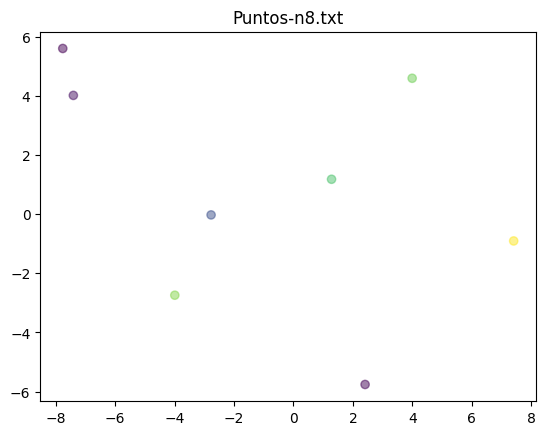

In [10]:
# Por cada instancia....

# 1. Lee los puntos
file_name = "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n8.txt"
n, puntos = lee_archivo( file_name )


# 2. Calcula la convex hull

elegidos, lowest = find_hull(n, puntos)

print(elegidos)

# 3. Y grafica...
draw_hull(puntos, elegidos, lowest, "Puntos-n8.txt")